In [35]:
import pandas as pd

In [36]:
df = pd.concat([pd.read_csv('results/oracle.csv'), pd.read_csv('results/oracle-for-optimization.csv')])

In [37]:
base_robust = df.loc[(df.protocol == 'base') & (df.overseer == 'robust') & (df.adversarial_alpha == 0)]
base_weak_negligent = df.loc[(df.protocol == 'base') & (df.overseer == 'weak-negligent') & (df.adversarial_alpha == 0)]
base_weak_negligent_slightly_adversarial = df.loc[(df.protocol == 'base') & (df.overseer == 'weak-negligent') & (df.adversarial_alpha == 0.05)]
base_weak_negligent_medium_adversarial = df.loc[(df.protocol == 'base') & (df.overseer == 'weak-negligent') & (df.adversarial_alpha == 0.35)]
base_weak_negligent_adversarial = df.loc[(df.protocol == 'base') & (df.overseer == 'weak-negligent') & (df.adversarial_alpha == 0.75)]

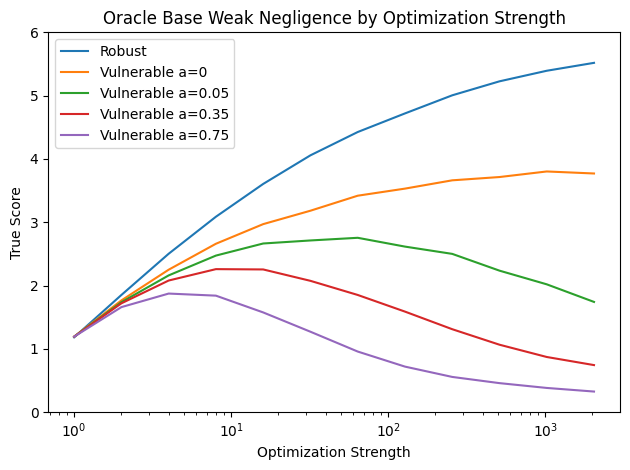

In [39]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.set_title('Oracle Base Weak Negligence by Optimization Strength')
ax.set_xlabel('Optimization Strength')
ax.set_xscale('log')
ax.set_ylabel('True Score')
ax.set_ylim(0, 6)
ax.plot(base_robust['optimization_strength'], base_robust['true_score'], label='Robust')
ax.plot(base_weak_negligent['optimization_strength'], base_weak_negligent['true_score'], label='Vulnerable a=0')
ax.plot(base_weak_negligent_slightly_adversarial['optimization_strength'], base_weak_negligent_slightly_adversarial['true_score'], label='Vulnerable a=0.05')
ax.plot(base_weak_negligent_medium_adversarial['optimization_strength'], base_weak_negligent_medium_adversarial['true_score'], label='Vulnerable a=0.35')
ax.plot(base_weak_negligent_adversarial['optimization_strength'], base_weak_negligent_adversarial['true_score'], label='Vulnerable a=0.75')

# Place the legend
ax.legend()
fig.tight_layout()


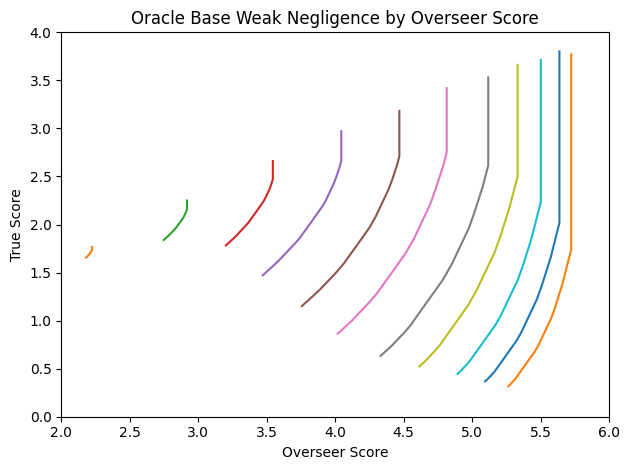

In [51]:
base_weak_negligent_all = df.loc[(df.protocol == 'base') & (df.overseer == 'weak-negligent')]

fig, ax = plt.subplots()

ax.set_title("Oracle Base Weak Negligence by Overseer Score")
ax.set_xlabel('Overseer Score')
ax.set_xlim(2, 6)
ax.set_ylabel('True Score')
ax.set_ylim(0, 4)
for optimization_strength in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]:
    to_plot = base_weak_negligent_all.loc[base_weak_negligent_all.optimization_strength == optimization_strength]
    ax.plot(to_plot['overseer_estimated_score'], to_plot['true_score'], label=f'Optimization Strength {optimization_strength}')

# Place the legend
fig.tight_layout()



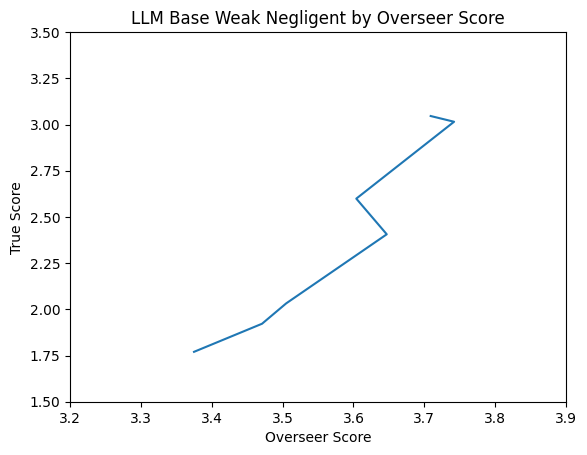

In [61]:
base_adversarial_sweep = pd.read_csv('results/base-adversarial-sweep.csv')
ax = base_adversarial_sweep.plot(x='overseer_estimated_score', y='true_score', title='LLM Base Weak Negligent by Overseer Score', xlabel='Overseer Score', ylabel='True Score', xlim=(3.2, 3.9), ylim=(1.5, 3.5), legend=False)